In [1]:
import pandas as pd
import numpy as np
import cv2
from skimage.transform import resize

In [2]:
train=pd.read_csv("./sign_data/train_data.csv",header=None)

In [3]:
train.head()

,0,1,2
0,068/09_068.png,068_forg/03_0113068.PNG,1
1,068/09_068.png,068_forg/01_0124068.PNG,1
2,068/09_068.png,068_forg/02_0124068.PNG,1
3,068/09_068.png,068_forg/01_0113068.PNG,1
4,068/09_068.png,068_forg/04_0124068.PNG,1


In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
a=[]
j=1
for i in range(1000):
    print(j)
    image=plt.imread("./sign_data/train/"+train[0][i])
    a.append(image)
    j=j+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
b=[]
j=1
for i in range(1000):
    print(j)
    image=plt.imread("./sign_data/train/"+train[1][i])
    b.append(image)
    j=j+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [7]:
plt.imshow(b1[1])

NameError: name 'b1' is not defined

In [13]:
a1=[resize(a[i], (120, 500)) for i in range(1000)]

In [14]:
b1=[resize(b[i], (120, 500)) for i in range(1000)]

In [15]:
train_data=[list(x) for x in zip(a1, b1)]

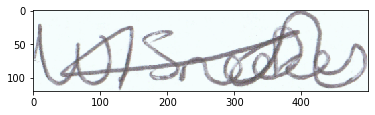

In [16]:
plt.imshow(train_data[0][0])

In [17]:
c=np.array(train_data)

In [18]:
y=[]
for i in range(1000):
    y.append(train[2][i])

In [19]:
import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K

from sklearn.utils import shuffle

import numpy.random as rng

Using TensorFlow backend.


In [20]:
input_shape=(120,500,3)
left_input = Input(input_shape)
right_input = Input(input_shape)

In [21]:
model = Sequential()
model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D())
model.add(Conv2D(128, (7,7), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (4,4), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (4,4), activation='relu'))
model.add(Flatten())
model.add(Dense(4096, activation='sigmoid'))

# Generate the encodings (feature vectors) for the two images
encoded_l = model(left_input)
encoded_r = model(right_input)

# Add a customized layer to compute the absolute difference between the encodings
L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
L1_distance = L1_layer([encoded_l, encoded_r])

# Add a dense layer with a sigmoid unit to generate the similarity score
prediction = Dense(1,activation='sigmoid')(L1_distance)

In [22]:
siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)

In [23]:
siamese_net.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 500, 3)  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 120, 500, 3)  0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 4096)         404913472   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 4096)         0           sequential_1[1][0]         

In [24]:
optimizer = Adam(lr = 0.00006)
siamese_net.compile(loss="binary_crossentropy",optimizer=optimizer)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    #for match_group in [True, False]:
    group_idx = np.random.choice(all_groups, size = batch_halfsize)
    out_img_a += [in_groups[c_idx,0]for c_idx in group_idx]
#         if match_group:
#             b_group_idx = group_idx
#             out_score += [1]*batch_halfsize
#         else:
#             # anything but the same group
#             non_group_idx = [np.random.choice([i for i in all_groups if i!=c_idx]) for c_idx in group_idx] 
#             b_group_idx = non_group_idx
#             out_score += [0]*batch_halfsize
            
    out_img_b += [in_groups[c_idx,1] for c_idx in group_idx]
    y=[in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
            
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.sta

In [26]:
aa=[1,1,2]
bb=[1,3,4]
cc=[1,1,0]

In [27]:
train_data1=[list(x) for x in zip(a1, b1,y)]

In [28]:
tt=np.array(train_data1)

In [29]:
tt[0,2]

1

In [30]:
def siam_gen(train_data1,batch):
    while True:
        out_img_a=[]
        out_img_b=[]
        y=[]
        a2=np.random.choice(len(train_data1),size = batch)
        #for i in range(batch)
        out_img_a += [train_data1[c_idx,0] for c_idx in a2]
        out_img_b += [train_data1[c_idx,1] for c_idx in a2]
        y+=[train_data1[c_idx,2] for c_idx in a2]
        #b2=np.random.choice(np.array(b1),size = batch)
        #y1=np.random.choice(np.array(y,size = batch)
       # pv_a, pv_b, pv_sim = gen_random_batch(train_groups, batch_size//2)
        
        yield [np.stack(out_img_a),np.stack(out_img_b)],np.stack(y)

In [31]:
next(siam_gen(tt,1))

([array([[[[0.95807216, 0.98944471, 0.98944471],
           [0.95872471, 0.99009726, 0.99009726],
           [0.96075033, 0.99212288, 0.99212288],
           ...,
           [0.96064837, 0.99215686, 0.99219085],
           [0.95254589, 0.99215686, 0.99421647],
           [0.94993569, 0.99215686, 0.99486902]],
  
          [[0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686],
           ...,
           [0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686]],
  
          [[0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686],
           ...,
           [0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686],
           [0.96078432, 0.99215686, 0.99215686]],
  
          ...,
  
          [[0.96078432, 0.99215686, 0.99

In [32]:
siamese_net.fit_generator(siam_gen(tt,batch=100), steps_per_epoch = 500,
                              # validation_split=0.2,
                                              epochs = 10,
                                             verbose = True)


Epoch 1/10
  1/500 [..............................] - ETA: 15:53:19 - loss: 0.6927

KeyboardInterrupt: 